<a href="https://colab.research.google.com/github/millenagena/Bootcamp_Data_Science_Alura/blob/main/Module%201/notebooks/Data_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

## Aula 03: Manipulação de dados

In [ ]:
usaveis = pd.read_csv('/content/drive/MyDrive/Alura/Bootcamp Data Science Aplicada 2/Módulo 1/Dados/usaveis.csv', 
                      encoding='utf-8', index_col = 'Unidade da Federação')
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326741.17,8425584.62,7250895.87,7480169.47,8773060.38,9855164.17,8152115.78,4654767.46
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3274600.36,2985439.26,2921021.35,2560191.29,2699663.11,2734200.04,2539104.34,1247105.57
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14960241.10,15939561.23,15138403.32,14779400.90,16334958.99,19462656.55,17641464.85,13923160.62,5437280.35
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,268274

In [ ]:
usaveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 157 entries, 2007/Ago to 2020/Ago
dtypes: float64(157)
memory usage: 33.3+ KB


### Escolhendo 5 estados para trabalharmos

In [ ]:
# nome dos estados

usaveis.T.columns 

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

#### Fazendo slice dos estados

In [ ]:
# pegando do 2º ao 4º elemento

usaveis.T.columns[1:4]

Index(['12 Acre', '13 Amazonas', '14 Roraima'], dtype='object', name='Unidade da Federação')

In [ ]:
# pegando do 0 ao 5º elemento

usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [ ]:
# nome dos estados também

usaveis.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
usaveis.index[0:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

#### Plotando os 7 primeiros estados



Observação: coincidentemente os 5 primeiros estados escolhidos foram todos da região norte, isso porque os estados estão ordenados numericamente

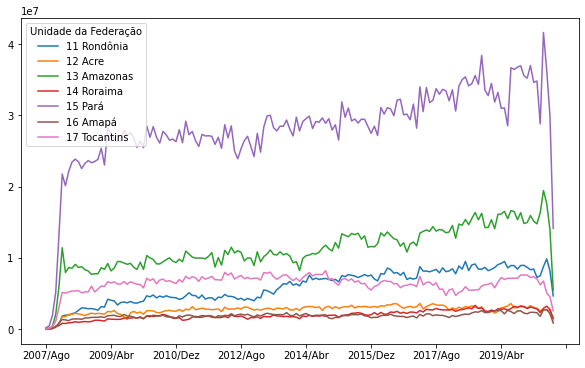

In [ ]:
usaveis[:7].T.plot(figsize=(10,6))

### Selecionando 7 estados aleatórios

In [ ]:
import numpy as np

# seed = fixa o valor aleatório que será gerado
# se vc seta um seed inicial, a seq aleatoria sempre vai ser a mesma
# pseudo randoness

np.random.seed(687942)

# amostra aleatório}
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,1.621211e+07,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,1.449030e+07,14203837.61,15160988.21,14348102.03,1.519860e+07,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,1.687568e+07,1.518414e+07,1.591326e+07,15189197.44,1.592950e+07,1.700099e+07,1.605530e+07,1.676368e+07,1.648738e+07,...,2.670799e+07,2.531364e+07,2.602193e+07,2.679787e+07,2.533631e+07,2.687584e+07,2.525766e+07,2.427612e+07,2.548025e+07,2.268667e+07,2.526673e+07,2.597511e+07,2.744456e+07,2.444462e+07,2.571680e+07,2.549852e+07,2.433823e+07,2.615885e+07,2.467166e+07,2.468369e+07,2.520104e+07,2.471017e+07,2.674073e+07,2.598106e+07,2.869092e+07,2.593689e+07,2.855051e+07,2.931246e+07,2.751913e+07,2.978876e+07,2.629417e+07,2.524250e+07,2.760549e+07,2.662058e+07,2.665702e+07,2.381820e+07,2.869785e+07,2.760265e+07,2.771705e+07,11187390.60
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,1.002407e+08,91831325.37,97289703.07,95723396.53,1.000500e+08,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,1.073899e+08,1.008298e+08,1.054856e+08,99666115.96,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521155e+08,1.524157e+08,1.581906e+08,1.414454e+08,1.472169e+08,1.264495e+08,1.371968e+08,1.364799e+08,1.220528e+08,58956671.59
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,1.176390e+07,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,1.229823e+07,11640067.28,12397524.20,12629319.37,1.317428e+07,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,1.516214e+07,1.364932e+07,1.424202e+07,12551831.85,1.347031e+07,1.415698e+07,1.394087e+07,1.327206e+07,1.347311e+07,...,2.022743e+07,1.886145e+07,1.876651e+07,2.002898e+07,1.853126e+07,1.812258e+07,1.816946e+07,1.811826e+07,1.904547e+07,1.825403e+07,2.097219e+07,2.071743e+07,2.199186e+07,2.090981e+07,2.154486e+07,2.261686e+07,1.992634e+07,2.229082e+07,2.044527e+07,1.938038e+07,2.114738e+07,2.077093e+07,2.177521e+07,2.220658e+07,2.381943e+07,2.161357e+07,2.213746e+07,2.307354e+07,2.343727e+07,2.308621e+07,2.035368e+07,2.013954e+07,2.220416e+07,2.051747e+07,2.093931e+07,1.732964e+07,1.997138e+07,2.047454e+07,2.091303e+07,9143379.53
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5.136475e+06,5051932.07,5200151.8

### Criando uma coluna com as regiões de cada estado

In [ ]:
usaveis_regioes = usaveis

# criando uma coluna contendo os primeiros dígitos dos índices
usaveis_regioes['Regiões'] = usaveis_regioes.index.str[0]

# criando um dicionário com os nomes das regiões para substituir os índices
regioes = {
    '1':'Norte',
    '2':'Nordeste',
    '3':'Sudeste',
    '4':'Sul',
    '5':'Centro-Oeste',
}

# substituindo os dígitos pelas regiões
usaveis_regioes['Regiões'] = usaveis_regioes['Regiões'].replace(regioes)

usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Regiões
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326741.17,8425584.62,7250895.87,7480169.47,8773060.38,9855164.17,8152115.78,4654767.46,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3274600.36,2985439.26,2921021.35,2560191.29,2699663.11,2734200.04,2539104.34,1247105.57,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14960241.10,15939561.23,15138403.32,14779400.90,16334958.99,19462656.55,17641464.85,13923160.62,5437280.35,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20,2737677.78,2

### Recriando a coluna "Total"

In [ ]:
usaveis = usaveis.drop('Regiões', axis=1)
usaveis['Total'] = usaveis.sum(axis=1)
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,2.624543e+06,2.973421e+06,2.938286e+06,2.843931e+06,2.878153e+06,2.780023e+06,2.651805e+06,3.147566e+06,3.082108e+06,4.190355e+06,4.040252e+06,3.946424e+06,3.372378e+06,3.720609e+06,3.787323e+06,3.679370e+06,3.866147e+06,3.667809e+06,3.633472e+06,3.812316e+06,3.911776e+06,4.663061e+06,4.524545e+06,4.778755e+06,4.369733e+06,4.632439e+06,4.464307e+06,4.668642e+06,4.490368e+06,4.423840e+06,...,8.041249e+06,8.199033e+06,8.363386e+06,7.889820e+06,8.603944e+06,8.048398e+06,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.326741e+06,8.425585e+06,7.250896e+06,7.480169e+06,8.773060e+06,9.855164e+06,8.152116e+06,4.654767e+06,9.319708e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,2.112577e+06,2.029128e+06,1.886872e+06,2.084885e+06,2.230838e+06,2.122013e+06,2.196652e+06,2.152239e+06,2.086776e+06,2.476364e+06,2.396888e+06,2.610262e+06,2.174098e+06,2.051885e+06,1.714708e+06,1.341532e+06,2.288459e+06,2.462713e+06,2.254900e+06,2.381536e+06,2.079981e+06,2.564838e+06,2.588318e+06,2.538526e+06,2.319786e+06,2.279157e+06,2.454599e+06,2.578924e+06,2.625443e+06,2.512995e+06,...,3.355223e+06,3.562692e+06,3.375297e+06,3.341498e+06,3.358378e+06,3.145385e+06,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.274600e+06,2.985439e+06,2.921021e+06,2.560191e+06,2.699663e+06,2.734200e+06,2.539104e+06,1.247106e+06,4.243069e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,8.646296e+06,8.755806e+06,8.331764e+06,8.148090e+06,7.681661e+06,7.761445e+06,7.764783e+06,8.607223e+06,8.385963e+06,9.207129e+06,8.160517e+06,8.562322e+06,9.484999e+06,9.465069e+06,9.267007e+06,9.092824e+06,9.218407e+06,8.674068e+06,8.365788e+06,9.386945e+06,8.373049e+06,1.032115e+07,9.990164e+06,9.767161e+06,9.151838e+06,9.140197e+06,9.437224e+06,9.742680e+06,9.996686e+06,9.532878e+06,...,1.371883e+07,1.439621e+07,1.374530e+07,1.397979e+07,1.389552e+07,1.351812e+07,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.535161e+07,1.633943e+07,1.482198e+07,1.496024e+07,1.593956e+07,1.513840e+07,1.477940e+07,1.633496e+07,1.946266e+07,1.764146e+07,1.392316e+07,5.437280e+06,1.773231e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,8.0844

### Ordenando os dados de acordo com a coluna Total

In [ ]:
# ordenando os dados de acordo com os valores da coluna total em ordem decrescente

ordenado_por_total = usaveis.sort_values(by='Total', ascending=False)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,...,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089287e+08,2.814082e+08,3.066387e+08,3.023725e+08,2.936888e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713606e+08,2.766347e+08,2.517854e+08,3.030341e+08,2.996327e+08,2.840361e+08,1.421588e+08,3.892344e+10
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521155e+08,1.524157e+08,1.581906e+08,1.414454e+08,1.472169e+08,1.264495e+08,1.371968e+08,1.364799e+08,1.220528e+08,5.895667e+07,1.916397e+10
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,...,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271744e+08,1.261844e+08,1.338593e+08,1.262183e+08,1.135536e+08,1.222759e+08,1.160738e+08,1.144843e+08,9.673171e+07,1.061245e+08,9.292745e+07,8.039540e+07,4.164370e+07,1.378709e+10
43 Rio Grande do Sul,1049252.

In [ ]:
# drop no eixo 1 da coluna total (tirando a coluna total)

ordenado_por_total = ordenado_por_total.drop('Total', axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,...,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089287e+08,2.814082e+08,3.066387e+08,3.023725e+08,2.936888e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713606e+08,2.766347e+08,2.517854e+08,3.030341e+08,2.996327e+08,2.840361e+08,1.421588e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521155e+08,1.524157e+08,1.581906e+08,1.414454e+08,1.472169e+08,1.264495e+08,1.371968e+08,1.364799e+08,1.220528e+08,5.895667e+07
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,...,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271744e+08,1.261844e+08,1.338593e+08,1.262183e+08,1.135536e+08,1.222759e+08,1.160738e+08,1.144843e+08,9.673171e+07,1.061245e+08,9.292745e+07,8.039540e+07,4.164370e+07
43 Rio Grande do Sul,10492

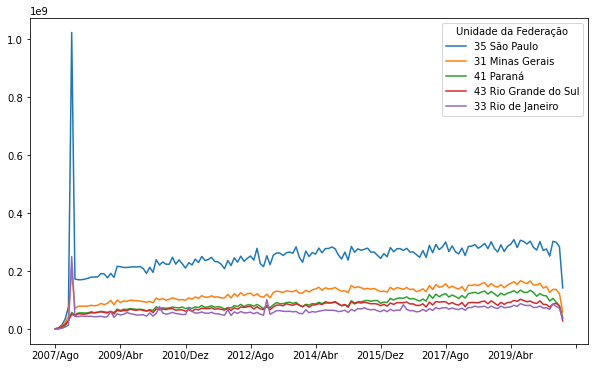

In [ ]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))


### Resolvendo o problema do valor discrepante existente na tabela em relação a coluna 2008/Jan em Sao Paulo

O que pode ter acontecido é que a data de atendimento deve ter sido antes de janeiro de 2008, só que em janeiro de 2008 todo mundo começou a inserir, fez um "super import". Só que as pessoas não tinham a data de atendimento de vários casos, então provavelmente colocaram todas em janeiro de 2008

In [ ]:
# retirando os dados de 2008/jan e anteriores
# fazendo um slice a partir da posição
# pega da sétima coluna em diante

colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

In [ ]:
usaveis_regioes

#ordenado_por_total.head(5).T.plot(figsize=(10,6))

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Regiões
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,2.624543e+06,2.973421e+06,2.938286e+06,2.843931e+06,2.878153e+06,2.780023e+06,2.651805e+06,3.147566e+06,3.082108e+06,4.190355e+06,4.040252e+06,3.946424e+06,3.372378e+06,3.720609e+06,3.787323e+06,3.679370e+06,3.866147e+06,3.667809e+06,3.633472e+06,3.812316e+06,3.911776e+06,4.663061e+06,4.524545e+06,4.778755e+06,4.369733e+06,4.632439e+06,4.464307e+06,4.668642e+06,4.490368e+06,4.423840e+06,...,8.041249e+06,8.199033e+06,8.363386e+06,7.889820e+06,8.603944e+06,8.048398e+06,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.326741e+06,8.425585e+06,7.250896e+06,7.480169e+06,8.773060e+06,9.855164e+06,8.152116e+06,4.654767e+06,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,2.112577e+06,2.029128e+06,1.886872e+06,2.084885e+06,2.230838e+06,2.122013e+06,2.196652e+06,2.152239e+06,2.086776e+06,2.476364e+06,2.396888e+06,2.610262e+06,2.174098e+06,2.051885e+06,1.714708e+06,1.341532e+06,2.288459e+06,2.462713e+06,2.254900e+06,2.381536e+06,2.079981e+06,2.564838e+06,2.588318e+06,2.538526e+06,2.319786e+06,2.279157e+06,2.454599e+06,2.578924e+06,2.625443e+06,2.512995e+06,...,3.355223e+06,3.562692e+06,3.375297e+06,3.341498e+06,3.358378e+06,3.145385e+06,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.274600e+06,2.985439e+06,2.921021e+06,2.560191e+06,2.699663e+06,2.734200e+06,2.539104e+06,1.247106e+06,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,8.646296e+06,8.755806e+06,8.331764e+06,8.148090e+06,7.681661e+06,7.761445e+06,7.764783e+06,8.607223e+06,8.385963e+06,9.207129e+06,8.160517e+06,8.562322e+06,9.484999e+06,9.465069e+06,9.267007e+06,9.092824e+06,9.218407e+06,8.674068e+06,8.365788e+06,9.386945e+06,8.373049e+06,1.032115e+07,9.990164e+06,9.767161e+06,9.151838e+06,9.140197e+06,9.437224e+06,9.742680e+06,9.996686e+06,9.532878e+06,...,1.371883e+07,1.439621e+07,1.374530e+07,1.397979e+07,1.389552e+07,1.351812e+07,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.535161e+07,1.633943e+07,1.482198e+07,1.496024e+07,1.593956e+07,1.513840e+07,1.477940e+07,1.633496e+07,1.946266e+07,1.764146e+07,1.392316e+07,5.437280e+06,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,8.084484e+05,7.716878e+05

Importando o dataset ordenado_por_total para que possa ser usado nas análises das próximas aulas

In [ ]:
ordenado_por_total.to_csv(path_or_buf = '/content/drive/MyDrive/Alura/Bootcamp Data Science Aplicada 2/Módulo 1/Dados/ordenado_por_total.csv')

## Desafios aula 03

### Desafio 01: Mudar palette de cores com matplotlib (olhar o seaborn tb)

In [ ]:
# criar uma lista com os estados escolhidos
estados = ['12 Acre', '53 Distrito Federal', '51 Mato Grosso', '29 Bahia']

# criando um novo dataframe apenas com os estados
df_estados = usaveis.loc[estados]
df_estados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3274600.36,2985439.26,2921021.35,2560191.29,2699663.11,2734200.04,2539104.34,1247105.57,4.243069e+08
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,12358825.51,14445518.57,14434211.04,14622167.93,14209413.80,14459081.79,15051993.46,14045711.83,13162775.24,13197596.70,12889509.22,13484046.67,13295738.66,14928384.44,13535496.11,14394599.86,13863063.00,14051586.56,15073336.93,14636724.40,14052063.36,14277016.84,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2.429819e+09
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16516213.32,15108438.61,13830817.13,15456284.98,14460000.76,14483101.59,12053219.15,14226454.24,14872087.55,13662875.86,7176902.35,2.039232e+09
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,73336297.08,33410124.06,41301703.40,42826993.62,42071294.17,39910042.40,57664560.93,43254543.33,42851268.02,43332573.68,40946908.97,41424654.95,43856594.59,41094717.03,51476930.68,49585513.41,50686984.15,48851108.39,51075073.25,53386058.82,50894817.50,50114090.45,48792856.88,47427830.70,4861

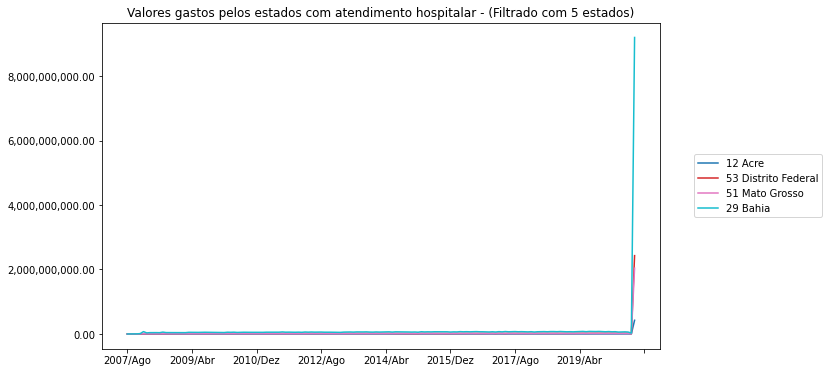

In [ ]:
ax = df_estados.T.plot(figsize=(10,6), colormap='tab10')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Valores gastos pelos estados com atendimento hospitalar - (Filtrado com 5 estados)')
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.show()

### Desafio 02: Criar uma coluna mostrando a região de cada estado

O desafio 2 foi realizado anteriormente

In [ ]:
 '''
sudeste = 31, 32, 33, 35
nordeste = 21,22,23,24,25,26,27,28,29
norte = 11,12,13,14,15,16,17
sul = 41,42,43
centro_oeste = 50,51,52,53
'''

'\nsudeste = 31, 32, 33, 35\nnordeste = 21,22,23,24,25,26,27,28,29\nnorte = 11,12,13,14,15,16,17\nsul = 41,42,43\ncentro_oeste = 50,51,52,53\n'

### Desafio 03: Deixar o gráfico mais bonito. A mensagem mais clara

Text(0.5, 0, 'Ano/Mês')

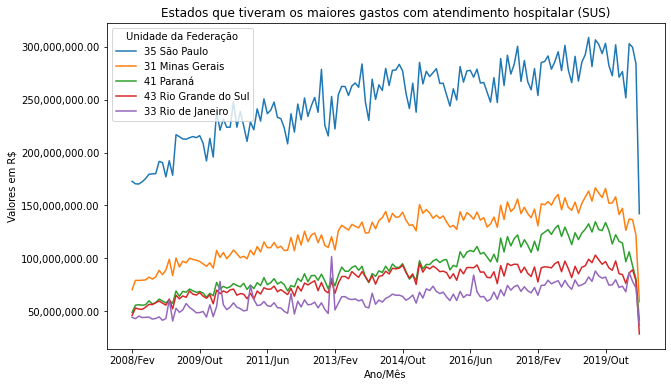

In [ ]:
# criando o gráfico
ax = ordenado_por_total.head(5).T.plot(figsize=(10,6))

# formatando o eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# colocando um título
plt.title('Estados que tiveram os maiores gastos com atendimento hospitalar (SUS)')

# descrevendo os eixos
ax.set_ylabel('Valores em R$')
ax.set_xlabel('Ano/Mês', )

### Desafio 04: adicione seu estado aos 5 estados existentes no plot 

In [ ]:
# colocando os 5 estados em um data frame
estados_mais_to = ordenado_por_total.head(5)

# criando uma series contendo os dados de tocantins
tocantins = ordenado_por_total.loc['17 Tocantins']

# adicionando a linha contendo os dados de tocantins no dataframe contendo os 5 estados
estados_mais_to.loc.__setitem__('17 Tocantins', tocantins)

estados_mais_to

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,2.106115e+08,2.290870e+08,2.215980e+08,2.413999e+08,2.298212e+08,2.507936e+08,...,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089287e+08,2.814082e+08,3.066387e+08,3.023725e+08,2.936888e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713606e+08,2.766347e+08,2.517854e+08,3.030341e+08,2.996327e+08,2.840361e+08,1.421588e+08
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077389e+08,1.031408e+08,1.110660e+08,1.060943e+08,1.154872e+08,...,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521155e+08,1.524157e+08,1.581906e+08,1.414454e+08,1.472169e+08,1.264495e+08,1.371968e+08,1.364799e+08,1.220528e+08,5.895667e+07
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271744e+08,1.261844e+08,1.338593e+08,1.262183e+08,1.135536e+08,1.222759e+08,1.160738e+08,1.144843e+08,9.673171e+07,1.061245e+08,9.292745e+07,8.039540e+07,4.164370e+07
43

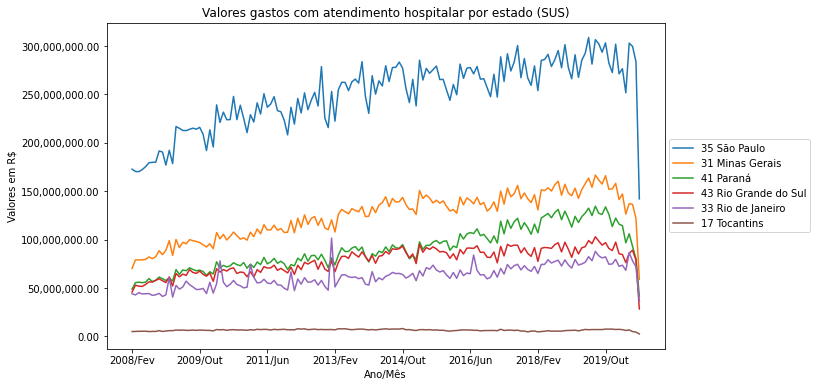

In [ ]:
# criando o gráfico
ax = estados_mais_to.T.plot(figsize=(10,6))

# formatando o eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# colocando um título
plt.title('Valores gastos com atendimento hospitalar por estado (SUS)')

# descrevendo os eixos
ax.set_ylabel('Valores em R$')
ax.set_xlabel('Ano/Mês', )

# alterando a posição da legenda
plt.legend(loc='right', bbox_to_anchor=(1.27, 0.5))

### Desafio 05: Plotar o grafico da região sudeste e analisar se o pico do rio de janeiro tambem se apresenta nos outros estados

In [ ]:
# selecionando os estados da região sudeste
sudeste = usaveis_regioes.query("Regiões == 'Sudeste'")
#sudeste = sudeste.drop(['Regiões', 'Total'], axis=1)
sudeste = sudeste.T.iloc[6:]
sudeste

Unidade da Federação,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo
2008/Fev,7.03011e+07,1.00329e+07,4.41226e+07,1.72835e+08
2008/Mar,7.9119e+07,1.2262e+07,4.28927e+07,1.70482e+08
2008/Abr,7.90463e+07,1.24535e+07,4.5296e+07,1.70278e+08
2008/Mai,7.92681e+07,1.17898e+07,4.39513e+07,1.72402e+08
2008/Jun,7.96087e+07,1.18897e+07,4.41029e+07,1.75417e+08
...,...,...,...,...
2020/Mai,1.37197e+08,2.86978e+07,8.65649e+07,3.03034e+08
2020/Jun,1.3648e+08,2.76026e+07,7.80944e+07,2.99633e+08
2020/Jul,1.22053e+08,2.7717e+07,7.2024e+07,2.84036e+08
2020/Ago,5.89567e+07,1.11874e+07,3.65644e+07,1.42159e+08


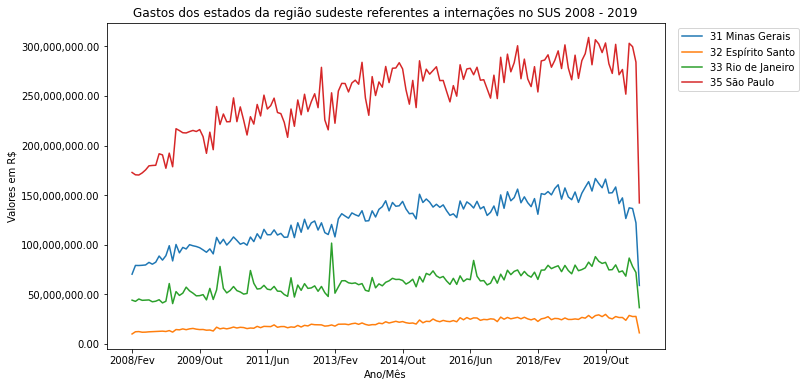

In [ ]:
sudeste = sudeste.drop('Regiões') # porque?

ax = sudeste.plot(figsize=(10,6))

# formatando o eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# titulo
plt.title('Gastos dos estados da região sudeste referentes a internações no SUS 2008 - 2019')

# eixos
ax.set_xlabel('Ano/Mês')
ax.set_ylabel('Valores em R$')

# legenda
ax.legend(loc='best', bbox_to_anchor=(1.25, 1))

Descrição gráfico

- Título: Gráfico dos estados da região sudeste referentes a internações no SUS 2008-2019
- Base de dados utilizada: Variável usaveis
- Tipo de gráfico: Linha
- Eixo X: Ano/Mês
- Eixo Y: Valores
- O que está sendo mostrado: Estamos visualizando a região Sudeste para comparar a sazonalidade entre os Estados São Paulo, Minas Gerais, Espírito Santo e Rio de Janeiro, seria visualizada em todos.


Análise do gráfico: É possível perceber que a sazonalidade se repete nos estados do sudeste com exceção do estado ES

### Desafio 06: Adicionar outro estado novamente

In [ ]:
# adicionando o Goiás
# 52 Goiás

sudeste_mais_go = list(sudeste.columns)
sudeste_mais_go.append('52 Goiás')
sudeste_mais_go

['31 Minas Gerais',
 '32 Espírito Santo',
 '33 Rio de Janeiro',
 '35 São Paulo',
 '52 Goiás']

In [ ]:
# filtrando e transpondo

sudeste_go = ordenado_por_total.T[sudeste_mais_go]
sudeste_go

Unidade da Federação,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,52 Goiás
2008/Fev,7.030109e+07,10032886.43,44122593.19,1.728349e+08,18149374.27
2008/Mar,7.911901e+07,12262049.08,42892665.52,1.704818e+08,20992213.03
2008/Abr,7.904632e+07,12453466.98,45295962.86,1.702783e+08,21049477.30
2008/Mai,7.926807e+07,11789786.09,43951349.46,1.724022e+08,19162546.79
2008/Jun,7.960865e+07,11889687.35,44102925.77,1.754166e+08,20332533.92
...,...,...,...,...,...
2020/Abr,1.264495e+08,23818195.44,68323602.96,2.517854e+08,27673568.75
2020/Mai,1.371968e+08,28697845.49,86564929.36,3.030341e+08,32146291.02
2020/Jun,1.364799e+08,27602649.88,78094394.16,2.996327e+08,35232487.47
2020/Jul,1.220528e+08,27717045.61,72023995.13,2.840361e+08,35247865.79


Text(0, 0.5, 'Valores em R$')

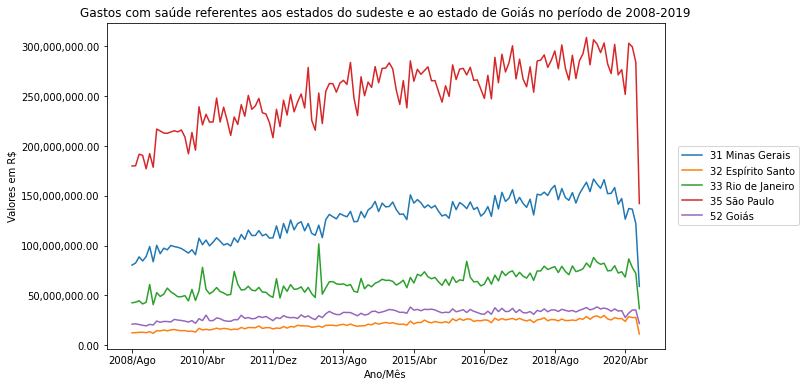

In [ ]:
# plot
ax = sudeste_go.iloc[6:].plot(figsize=(10,6))

# formatando o eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# título
plt.title('Gastos com saúde referentes aos estados do sudeste e ao estado de Goiás no período de 2008-2019')

# legenda
ax.legend(loc='right', bbox_to_anchor=(1.25, 0.5))

# eixos
ax.set_xlabel('Ano/Mês')
ax.set_ylabel('Valores em R$')

Descrição gráfico

- Título: Gastos com saúde referentes aos estados do sudeste e ao estado de Goiás no período de 2008-2019
- Base de dados utilizada: Variável ordenado_por_total
- Tipo de gráfico: Linha
- Eixo X: Ano/Mês
- Eixo Y: Valoresem R$
- O que está sendo mostrado: Estamos visualizando a região Sudeste e o estado de Goiás para comparar suas sazonalidades

Análise do gráfico: É possível perceber que o estado de Goiás e do Espírito Santo seguem a mesma sazonalidade